In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('image_1.jpg')
img_RGB = cv2.cvtColor (img, cv2.COLOR_BGR2RGB) # Преобразовать в RGB для последующего отображения
 # Обработка оттенков серого изображения
grayImage = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### Метод Собеля

In [3]:
# Оператор Собеля
x = cv2.Sobel(grayImage, cv2.CV_16S, 1, 0)
y = cv2.Sobel(grayImage, cv2.CV_16S, 0, 1)
# вернуться к uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#### Метод Лапласа

In [4]:
# Оператор Лапласа
x = cv2.Laplacian(grayImage, cv2.CV_16S)
y = cv2.Laplacian(grayImage, cv2.CV_16S)
# вернуться к uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Laplacian = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#### Метод Робертса

In [5]:
# Оператор Робертса
kernelx = np.array([[-1, 0], [0, 1]], dtype=int)
kernely = np.array([[0, -1], [1, 0]], dtype=int)
x = cv2.filter2D(grayImage, cv2.CV_16S, kernelx)
y = cv2.filter2D(grayImage, cv2.CV_16S, kernely)
 # Turn uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#### Метод Канни

In [6]:
detected_edges = cv2.GaussianBlur(grayImage,(3,3),0)
detected_edges = cv2.Canny(grayImage,100,250,L2gradient=False)

#### Отображение графики

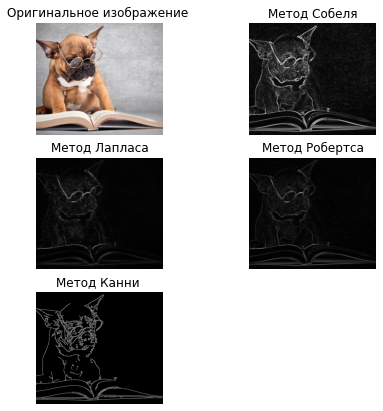

In [7]:
fig = plt.figure(figsize=(7, 7))
rows = 3
columns = 2

# Отображение графики
titles = [u'Оригинальное изображение ', u'Метод Собеля', u'Метод Лапласа', u'Метод Робертса', u'Метод Канни ']
images = [img_RGB, Sobel, Laplacian, Roberts, detected_edges]
for i in range(5):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(images[i] , 'gray')
    plt.axis('off')
    plt.title(titles[i])
plt.show()

#### Преобразование Хаффа

In [8]:
img = cv2.imread('image_2.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 150, apertureSize = 3)

minLineLength = img.shape[1] - 300
lines = cv2.HoughLinesP(image = edges, rho = 0.02, theta = np.pi / 500, threshold = 10, lines = np.array([]), minLineLength = minLineLength, maxLineGap = 200)

a,b,c = lines.shape
for i in range(a):
    cv2.line(img, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv2.LINE_AA)

#### Отображение графики

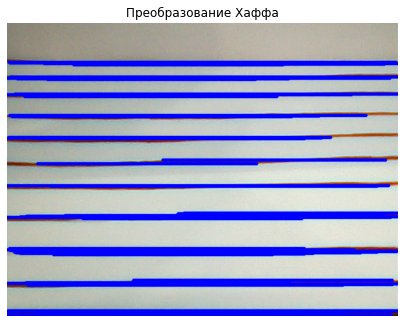

In [9]:
fig = plt.figure(figsize=(7, 7))

# Отображение графики
plt.imshow(edges , 'gray')
plt.imshow(img , 'gray')
plt.axis('off')
plt.title('Преобразование Хаффа')
plt.show()

#### Бинаризация Отсу

In [10]:
img = cv2.imread('image_1.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret2, th2 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

#### Отображение графики

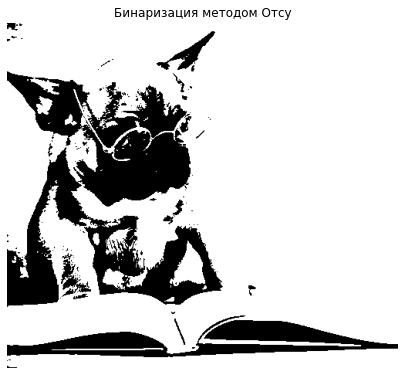

In [11]:
fig = plt.figure(figsize=(7, 7))

# Отображение графики
plt.imshow(th2 , 'gray')
plt.axis('off')
plt.title('Бинаризация методом Отсу')
plt.show()

#### Текстурная сегментация

In [25]:
img = cv2.imread('image_3.jpeg')
raw_img = img
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
raw_hsv_img = hsv_img

In [26]:
green_low = np.array([45 , 100, 50] )
green_high = np.array([75, 255, 255])
curr_mask = cv2.inRange(hsv_img, green_low, green_high)
hsv_img[curr_mask > 0] = ([75,255,200])

In [27]:
## Преобразование HSV-изображения к оттенкам серого для дальнейшего оконтуривания
RGB_again = cv2.cvtColor(hsv_img, cv2.COLOR_HSV2RGB)
gray = cv2.cvtColor(RGB_again, cv2.COLOR_RGB2GRAY)
#viewImage(gray) ## 3

In [36]:
ret, threshold = cv2.threshold(gray, 90, 255, 0)
contours, hierarchy = cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0, 0, 255), 3)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 40,  35,  34],
        [ 40,  35,  34],
        [ 38,  33,  30]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 37,  32,  31],
        [ 31,  26,  25],
        [ 36,  31,  28]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [ 34,  29,  28],
        [ 26,  21,  20],
        [ 26,  21,  20]],

       ...,

       [[ 20,  15,  14],
        [ 21,  16,  15],
        [ 20,  15,  14],
        ...,
        [ 27,  22,  21],
        [ 26,  21,  20],
        [ 23,  18,  17]],

       [[ 25,  20,  19],
        [ 24,  19,  18],
        [ 21,  16,  15],
        ...,
        [ 25,  20,  19],
        [ 23,  18,  17],
        [ 17,  12,  11]],

       [[ 24,  19,  18],
        [ 24,  19,  18],
        [ 23,  18,  17],
        ...,
        [ 20,  15,  14],
        [ 17,  12,  11],
        [ 14,   9,   8]]

#### Отображение графики

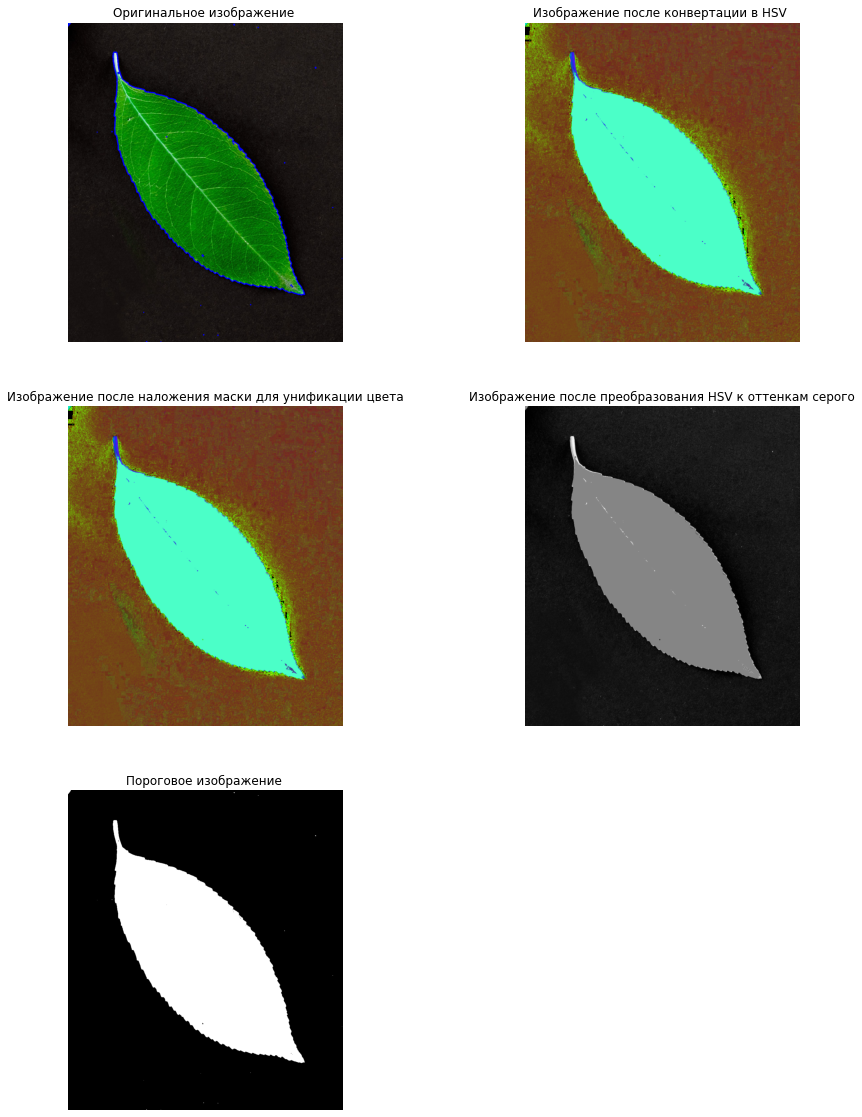

In [34]:
fig = plt.figure(figsize=(15, 20))
rows = 3
columns = 2

# Отображение графики
titles = [u'Оригинальное изображение ', u'Изображение после конвертации в HSV ', u'Изображение после наложения маски для унификации цвета', u'Изображение после преобразования HSV к оттенкам серого', u'Пороговое изображение ', u'Конечное оконтуривание ']
images = [raw_img, raw_hsv_img, hsv_img, gray, threshold, img]
for i in range(5):
    fig.add_subplot(rows, columns, i + 1)
    plt.imshow(images[i] , 'gray')
    plt.axis('off')
    plt.title(titles[i])
plt.show()